**Import the Libraries**

In [1]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [2]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import os

**Data Collection and Processing**

In [3]:
data_link = "https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv"
od.download(data_link)

Skipping, found downloaded files in "./vehicle-dataset-from-cardekho" (use force=True to force download)


In [4]:
os.listdir("./vehicle-dataset-from-cardekho")

['car details v4.csv',
 'CAR DETAILS FROM CAR DEKHO.csv',
 'Car details v3.csv',
 'car data.csv']

In [5]:
dataset = pd.read_csv("./vehicle-dataset-from-cardekho/car data.csv")

In [6]:
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [8]:
dataset.shape

(301, 9)

In [9]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**Encoding the Categorical Data**

In [11]:
#Encode the fuel  type
dataset.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}}, inplace=True)

#Encode the seller  type
dataset.replace({"Seller_Type":{"Dealer":0,"Individual":1}}, inplace=True)

#Encode the transimission
dataset.replace({"Transmission":{"Manual":0,"Automatic":1}}, inplace=True)

In [12]:
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Train and Test splitting**

In [13]:
X = dataset.drop(["Car_Name", "Selling_Price"], axis=1)
Y = dataset["Selling_Price"]

In [14]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

**Model Training**

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, Y_train)

LinearRegression()

**Model Evaluation**

In [19]:
train_pred = model.predict(X_train)

In [20]:
# R squared error
err_score = metrics.r2_score(Y_train, train_pred)
print("R squared Error: ", err_score)

R squared Error:  0.8799451660493711


**Visualize the actual and predicted prices**

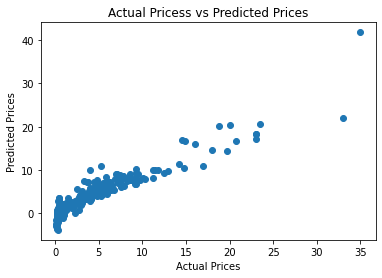

In [21]:
plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Pricess vs Predicted Prices")
plt.show()

In [22]:
test_pred = model.predict(X_test)

In [23]:
# R squared error
err_score = metrics.r2_score(Y_test, test_pred)
print("R squared Error: ", err_score)

R squared Error:  0.8365766715027051


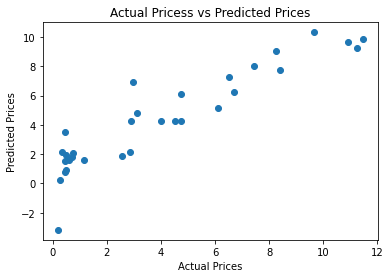

In [24]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Pricess vs Predicted Prices")
plt.show()

**Lasso Regression**

In [25]:
model_lasso = Lasso()

In [26]:
model_lasso.fit(X_train, Y_train)

Lasso()

**Model Evaluation**

In [27]:
train_pred = model.predict(X_train)

In [28]:
# R squared error
err_score = metrics.r2_score(Y_train, train_pred)
print("R squared Error: ", err_score)

R squared Error:  0.8799451660493711


**Visualization the actual prices and the predicted prices**

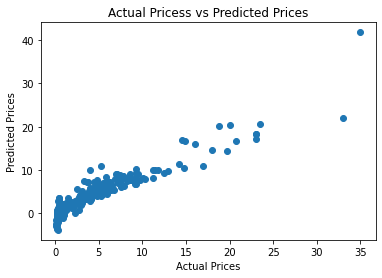

In [29]:
plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Pricess vs Predicted Prices")
plt.show()

In [30]:
test_pred = model.predict(X_test)

In [31]:
# R squared error
err_score = metrics.r2_score(Y_test, test_pred)
print("R squared Error: ", err_score)

R squared Error:  0.8365766715027051


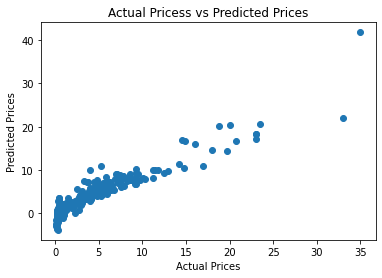

In [32]:
plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Pricess vs Predicted Prices")
plt.show()